In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [21]:
data=pd.read_csv(r"sales.csv")

In [22]:
data

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [23]:
data.corr()

,CPI,discounts,offers,Sales
CPI,1.000000,0.664772,-0.445300,0.901476
discounts,0.664772,1.000000,-0.816902,0.829877
offers,-0.445300,-0.816902,1.000000,-0.734167
Sales,0.901476,0.829877,-0.734167,1.000000


In [24]:
data.describe()

,CPI,discounts,offers,Sales
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.333333,16.500000,648333.333333
std,587.934237,1.211060,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.500000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


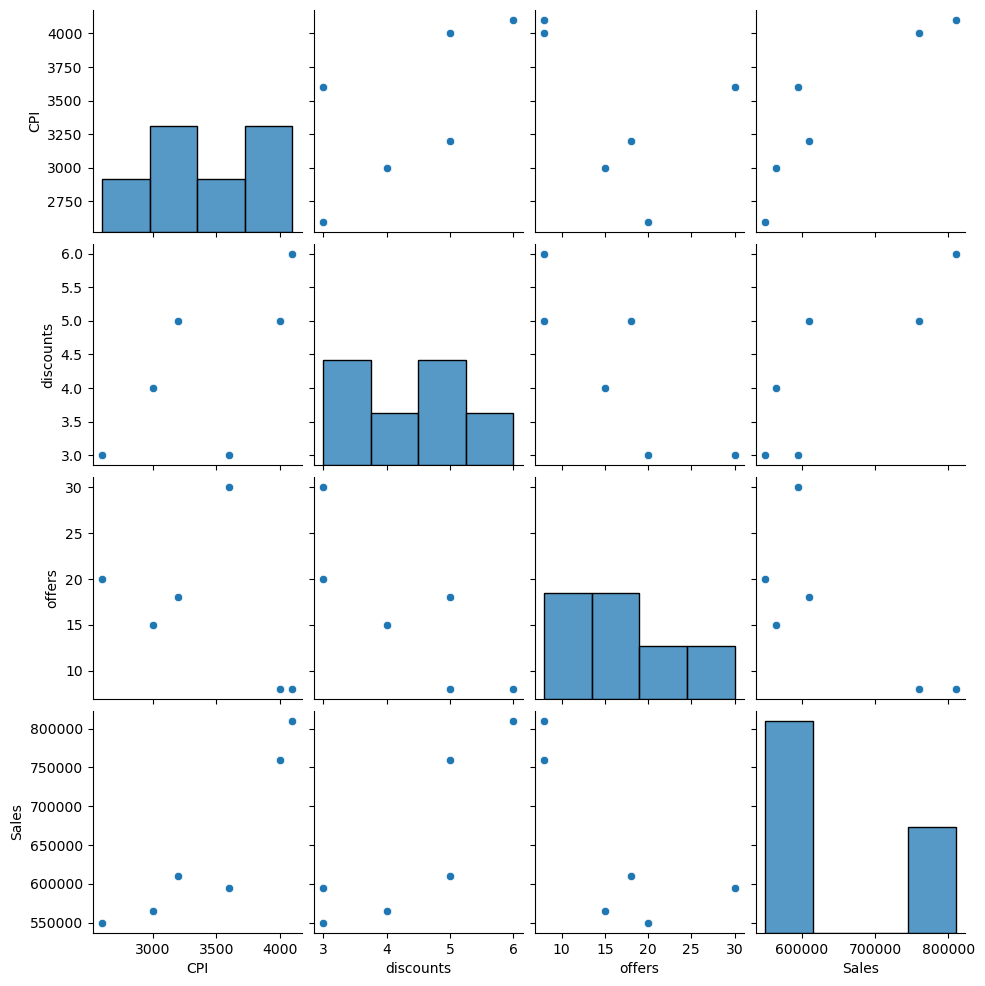

In [25]:
sns.pairplot(data)

In [48]:
x = data[['CPI', 'discounts', 'offers']]
y = data.Sales

In [49]:
X

array([[-1.52162173, -1.20604538,  0.46257302],
       [-0.77633762, -0.30151134, -0.19824558],
       [-0.40369556,  0.60302269,  0.19824558],
       [ 0.34158855, -1.20604538,  1.78421022],
       [ 1.08687266,  0.60302269, -1.12339162],
       [ 1.27319369,  1.50755672, -1.12339162]])

In [50]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x,y)
y_pred = regr.predict(x)

In [51]:
y_pred

array([518401.04171196, 600201.34257367, 617094.24971522, 597810.70928584,
       768867.81214403, 787624.84456927])

In [52]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: Sales, dtype: int64

In [53]:
from sklearn.metrics import r2_score
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.9517053277318955


In [54]:
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -8.731149137020111e-11


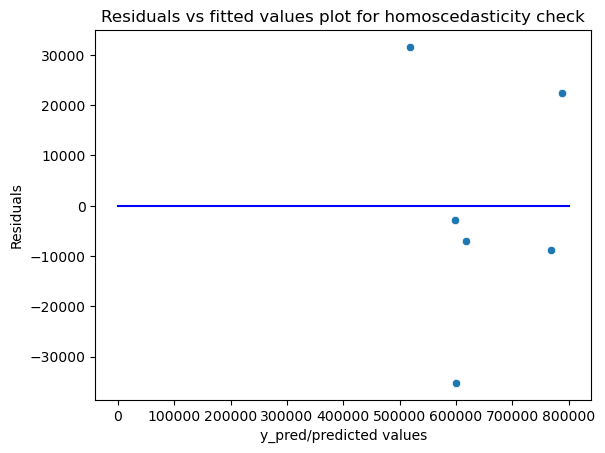

In [55]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,800000],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

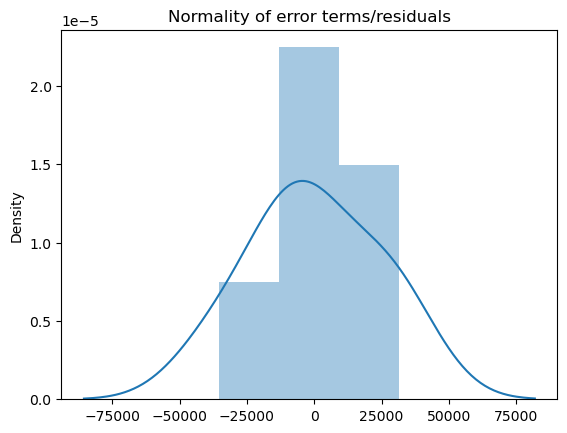

In [56]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [57]:
regr.predict([[5000,3,20]])

array([826645.34838222])

In [58]:
regr.predict([[4000,8,19]])

array([732680.36486005])